# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [1]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib import style
import pandas as pd

# File to Load (Remember to change these)
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [2]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
...,...,...,...,...,...,...
2370,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598,6,Rural
2371,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352,2,Rural
2372,North Jaime,2019-02-10 21:03:50,11.11,2781339863778,1,Rural
2373,West Heather,2019-05-07 19:22:15,44.94,4256853490277,4,Rural


## Deliverable 1: Get a Summary DataFrame 

In [3]:
#  1. Get the total rides for each city type
total_rides_per_city = pyber_data_df.groupby(['type']).count()['ride_id']
total_rides_per_city

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [4]:
# 2. Get the total drivers for each city type
total_drivers_per_city = city_data_df.groupby(['type']).sum()['driver_count']
total_drivers_per_city

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [5]:
#  3. Get the total amount of fares for each city type
total_fares_per_city = pyber_data_df.groupby(['type']).sum()['fare']
total_fares_per_city

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [6]:
#  4. Get the average fare per ride for each city type. 
average_fares_per_city = pyber_data_df.groupby(['type']).mean()['fare']
average_fares_per_city

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
Name: fare, dtype: float64

In [7]:
# 5. Get the average fare per driver for each city type. 
average_fare_per_driver_by_city_type = total_fares_per_city / total_drivers_per_city
average_fare_per_driver_by_city_type

type
Rural       55.486282
Suburban    39.502714
Urban       16.571468
dtype: float64

In [20]:
# Get the average rides per driver for each city type.
average_rides_per_driver = total_rides_per_city / total_drivers_per_city
average_rides_per_driver

Rural       1.602564
Suburban    1.275510
Urban       0.675676
dtype: float64

In [8]:
#  6. Create a PyBer summary DataFrame. 
pyber_summary_df = pd.DataFrame({
    "Total Rides": total_rides_per_city,
    "Total Drivers": total_drivers_per_city,
    "Total Fares": total_fares_per_city,
    "Average Fare per Ride": average_fares_per_city,
    "Average Fare per Driver": average_fare_per_driver_by_city_type
                                })
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
type,,,,,
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [9]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None

In [10]:
pyber_summary_df["Total Rides"] = pyber_summary_df["Total Rides"].map("{:,.0f}".format)
pyber_summary_df["Total Drivers"] = pyber_summary_df["Total Drivers"].map("{:,.0f}".format)
pyber_summary_df["Total Fares"] = pyber_summary_df["Total Fares"].map("${:,.0f}".format)
pyber_summary_df["Average Fare per Ride"] = pyber_summary_df["Average Fare per Ride"].map("${:,.2f}".format)
pyber_summary_df["Average Fare per Driver"] = pyber_summary_df["Average Fare per Driver"].map("${:,.2f}".format)

# test
#pyber_summary_df

## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [11]:
# 1. Read the merged DataFrame
pyber_data_df

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
...,...,...,...,...,...,...
2370,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598,6,Rural
2371,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352,2,Rural
2372,North Jaime,2019-02-10 21:03:50,11.11,2781339863778,1,Rural
2373,West Heather,2019-05-07 19:22:15,44.94,4256853490277,4,Rural


In [12]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
pyber_date_type_df = pyber_data_df.groupby(["type", "date"]).sum()[["fare"]]
pyber_date_type_df

fare
type  date                      
Rural 2019-01-01 09:45:36  43.69
      2019-01-02 11:18:32  52.12
      2019-01-03 19:51:01  19.90
      2019-01-04 03:31:26  24.88
      2019-01-06 07:38:40  47.33
...                          ...
Urban 2019-05-08 04:20:00  21.99
      2019-05-08 04:39:49  18.45
      2019-05-08 07:29:01  18.55
      2019-05-08 11:38:35  19.77
      2019-05-08 13:10:18  18.04

[2375 rows x 1 columns]

In [13]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
# df = df.reset_index()
pyber_date_type_df = pyber_date_type_df.reset_index()
pyber_date_type_df

,type,date,fare
0,Rural,2019-01-01 09:45:36,43.69
1,Rural,2019-01-02 11:18:32,52.12
2,Rural,2019-01-03 19:51:01,19.90
3,Rural,2019-01-04 03:31:26,24.88
4,Rural,2019-01-06 07:38:40,47.33
...,...,...,...
2370,Urban,2019-05-08 04:20:00,21.99
2371,Urban,2019-05-08 04:39:49,18.45
2372,Urban,2019-05-08 07:29:01,18.55
2373,Urban,2019-05-08 11:38:35,19.77


In [14]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
pyber_date_type_pivot = pyber_date_type_df.pivot(index="date", columns="type", values="fare")
pyber_date_type_pivot

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-05-08 04:20:00,NaN,NaN,21.99
2019-05-08 04:39:49,NaN,NaN,18.45
2019-05-08 07:29:01,NaN,NaN,18.55


In [15]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.
new_dates_df = pyber_date_type_pivot.loc['2019-01-01':'2019-04-29']
new_dates_df


type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-04-28 14:28:36,NaN,NaN,11.46
2019-04-28 16:29:16,NaN,NaN,36.42
2019-04-28 17:26:52,NaN,NaN,31.43


In [16]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
# df.index = pd.to_datetime(df.index)
new_dates_df.index = pd.to_datetime(new_dates_df.index)

In [17]:
# 7. Check that the datatype for the index is datetime using df.info()
new_dates_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2196 entries, 2019-01-01 00:08:16 to 2019-04-28 19:35:03
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     114 non-null    float64
 1   Suburban  573 non-null    float64
 2   Urban     1509 non-null   float64
dtypes: float64(3)
memory usage: 68.6 KB


In [18]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
new_dates_weeks_df = new_dates_df.resample("W").sum()
new_dates_weeks_df.head()

type,Rural,Suburban,Urban
date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94


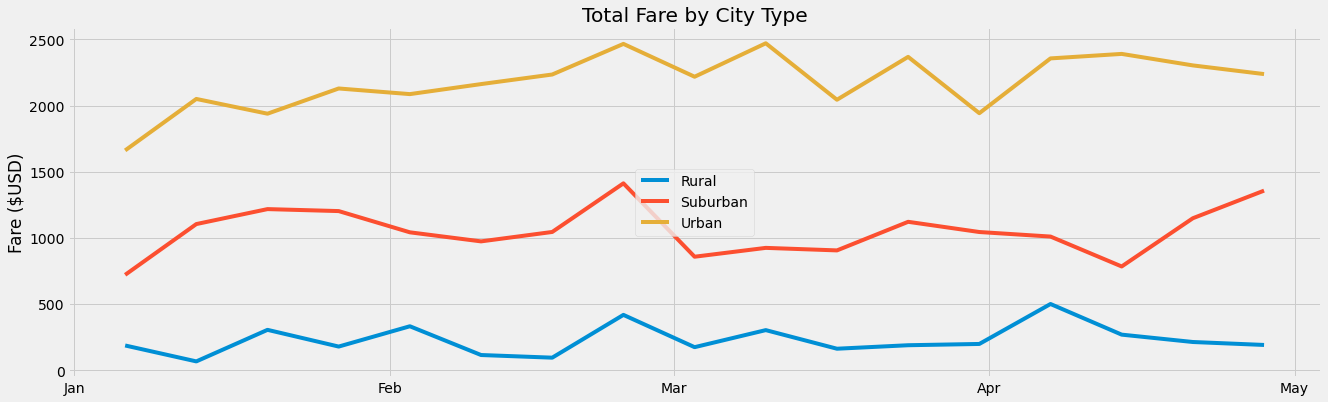

In [25]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 

plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize=(20, 6))

# Add Title
ax.set_title('Total Fare by City Type')

# Add y-axis label
ax.set_ylabel('Fare ($USD)')

# Make ticks be on each month
ax.xaxis.set_major_locator(mdates.MonthLocator())

# Show months
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))

# Create the plot with ax.plt()
ax.plot(new_dates_weeks_df['Rural'].index, new_dates_weeks_df['Rural'], label="Rural")

ax.plot(new_dates_weeks_df['Suburban'].index, new_dates_weeks_df['Suburban'], label="Suburban")

ax.plot(new_dates_weeks_df['Urban'].index, new_dates_weeks_df['Urban'], label="Urban")

# Add a legend
ax.legend(loc='center')

# Import the style from Matplotlib.
# (Added to first cell)

# Use the graph style fivethirtyeight.
plt.style.use('fivethirtyeight')

# Save chart to analysis folder
plt.savefig("analysis/PyBer_fare_summary.png")

# Show chart
plt.show()

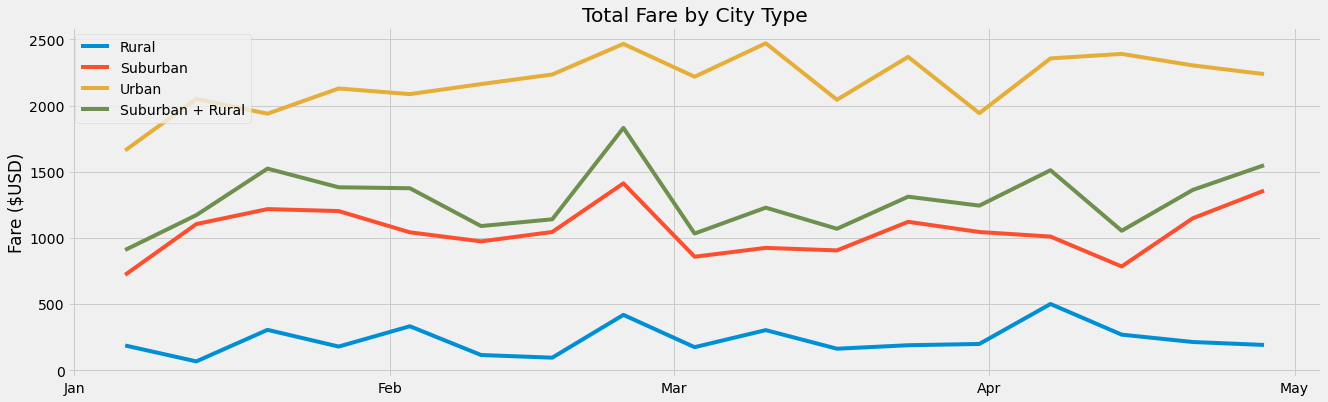

In [28]:
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize=(20, 6))

# Add Title
ax.set_title('Total Fare by City Type')

# Add y-axis label
ax.set_ylabel('Fare ($USD)')

# Make ticks be on each month
ax.xaxis.set_major_locator(mdates.MonthLocator())

# Show months
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))

# Create the plot with ax.plt()
ax.plot(new_dates_weeks_df['Rural'].index, new_dates_weeks_df['Rural'], label="Rural")

ax.plot(new_dates_weeks_df['Suburban'].index, new_dates_weeks_df['Suburban'], label="Suburban")

ax.plot(new_dates_weeks_df['Urban'].index, new_dates_weeks_df['Urban'], label="Urban")

ax.plot(new_dates_weeks_df['Urban'].index, new_dates_weeks_df['Suburban'] + new_dates_weeks_df['Rural'], label="Suburban + Rural")

# Add a legend
ax.legend(loc='upper left')

# Import the style from Matplotlib.
# (Added to first cell)

# Use the graph style fivethirtyeight.
plt.style.use('fivethirtyeight')

# Save chart to analysis folder
plt.savefig("analysis/PyBer_fare_summary_revised.png")

# Show chart
plt.show()